In [2]:
import pandas as pd
from scipy.stats import uniform
import numpy as np 


In [3]:
x_1_t = uniform.rvs(loc=5, scale=1, size=1000).reshape(-1,1)
x_2_t = uniform.rvs(loc=1, scale=0, size=1000).reshape(-1,1)
y_T = uniform.rvs(loc=8, scale=1, size=1000).reshape(-1,1)
w_t = np.ones(1000).reshape(-1,1)


In [4]:
treament_df = pd.DataFrame(np.concatenate([x_1_t,x_2_t,y_T,w_t], axis=1), columns=['X_1', 'X_2', 'Y', 'W'])

In [5]:
treament_df.head(5)

,X_1,X_2,Y,W
0,5.412553,1.0,8.785037,1.0
1,5.915700,1.0,8.453703,1.0
2,5.328312,1.0,8.097093,1.0
3,5.839596,1.0,8.926386,1.0
4,5.105009,1.0,8.181415,1.0


In [6]:
control_data = treament_df.drop(['W'], axis=1)


In [7]:
mu, sigma = 0, 0.4
noise = np.random.normal(mu, sigma, [1000,3]) 
control_data = control_data + noise

In [8]:
control_data["W"] = (np.zeros(1000).reshape(-1,1))

In [11]:
control_data.head(5)
control_data = control_data.sample(frac=0.5, replace=True, random_state=1)

In [12]:
frames = [control_data, treament_df]
full_data = pd.concat(frames)
!pip install git+https://github.com/pydata/pandas-datareader.git


  Cloning https://github.com/pydata/pandas-datareader.git to /private/var/folders/n4/88r14vqj6x3fd_mr8d413kmr0000gn/T/pip-req-build-sgo36aev
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /private/var/folders/n4/88r14vqj6x3fd_mr8d413kmr0000gn/T/pip-req-build-sgo36aev
  Created wheel for pandas-datareader: filename=pandas_datareader-0.10.0.dev0+30.gadb67b2-py3-none-any.whl size=108705 sha256=b9632bdb137bb49c2347aaa61ab00d186c7fcbe825db0cf2c57129e2e2179ba2
  Stored in directory: /private/var/folders/n4/88r14vqj6x3fd_mr8d413kmr0000gn/T/pip-ephem-wheel-cache-cuwvium5/wheels/54/6a/47/b1e68c4877ae6bf9a511e84e13972507e0fac9e17335156eb7
Successfully built pandas-datareader


In [18]:
full_data
full_data.to_csv('data_ps.csv', index=False)


In [514]:
X = df[df.columns[0:3]]
Y = df[df.columns[3]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [515]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(10,3), activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 10, 10)            40        
_________________________________________________________________
dropout_129 (Dropout)        (None, 10, 10)            0         
_________________________________________________________________
dense_194 (Dense)            (None, 10, 10)            110       
_________________________________________________________________
dropout_130 (Dropout)        (None, 10, 10)            0         
_________________________________________________________________
dense_195 (Dense)            (None, 10, 10)            110       
_________________________________________________________________
dropout_131 (Dropout)        (None, 10, 10)            0         
_________________________________________________________________
dense_196 (Dense)            (None, 10, 10)          

In [516]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [518]:
model.fit(X_train, y_train, epochs=500, batch_size=5)


 accuracy: 0.7307
Epoch 307/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.7147
Epoch 308/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7000
Epoch 309/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.7213
Epoch 310/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7340
Epoch 311/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7180
Epoch 312/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5196 - accuracy: 0.7240
Epoch 313/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.7327
Epoch 314/500
300/300 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7173
Epoch 315/500
300/300 [==============================] - 1s 3ms/step - loss: 0.5250 - accuracy: 0.7253
Epoch 316/500
300/300 [==============================] 

In [519]:
predicitions = model.predict(X_test)
dataframe=pd.DataFrame(predicitions, columns=['class 1', 'class 2']) 


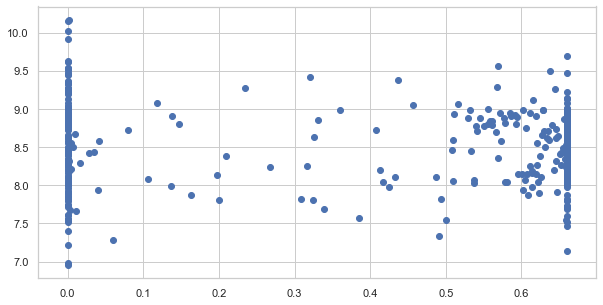

In [521]:
x = dataframe['class 2']
y = X_test.Y
preds_classes = np.argmax(predicitions, axis=-1)
colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}

plt.scatter(x, y)

In [482]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

19/19 [==============================] - 0s 853us/step - loss: 0.1776 - accuracy: 0.8829
Accuracy: 88.29


In [471]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [483]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
